<h1>IBM Data Science Capstone: Car Accident Severity Notebook

<h2>Introduction/Business Problem

<p>This project is based on the case study which is to predict the severity of an accident. Say you are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from a far shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to. Well, this is exactly the problem we have to find solution for. In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.


<h2>Data Understanding

<p>First, I imported the libraries that are required for this project.

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<h3>About dataset

<p>Second, read .csv file and load data.

In [3]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<p> Next , list the datatypes

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

<p>Then, I began choosing columns to use from the dataframe that I created. The columns that I chose were SEVERITYCODE, which assigns a crash a value of 1, which means no injury, and 2, indicating injury, COLLISIONTYPE, which describes the type of crash, WEATHER, which describes the weather at the time of crash, ROADCOND, which describes the condition of the road at the time of crash, LIGHTCOND, which describes the light conditions at the time of crash, INATTENTIONIND, which describes whether the driver was distracted, and UNDERINFL, which describes whether the driver was under the influence.

In [6]:
df['SEVERITYDESC'].value_counts().to_frame() #choosing column for the filtered dataframe

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [7]:
df_Conditions_balanced=df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','INATTENTIONIND','UNDERINFL']]
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
df_Conditions_balanced.dtypes

SEVERITYCODE       int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
COLLISIONTYPE     object
INATTENTIONIND    object
UNDERINFL         object
dtype: object

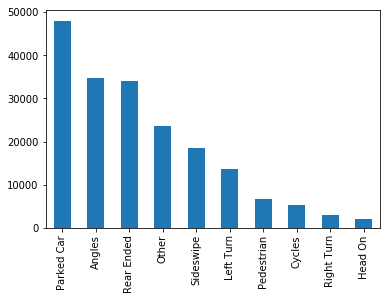

In [9]:

df_Conditions_balanced['COLLISIONTYPE'].value_counts().plot(kind = 'bar')

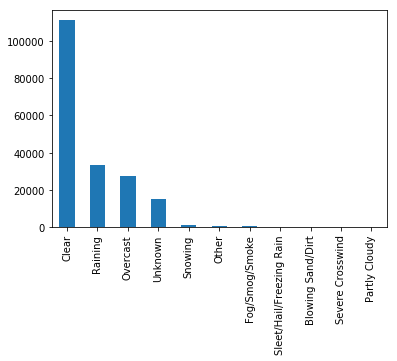

In [10]:
df_Conditions_balanced['WEATHER'].value_counts().plot(kind = 'bar')

<p>Most crashes happened in clear, raining, and bright conditions. Most days are clear, raining, and bright, so it’s no surprise that most car crashes occur under these conditions.

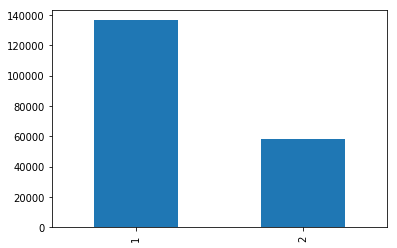

In [11]:
df_Conditions_balanced['SEVERITYCODE'].value_counts().plot(kind = 'bar')

<p> SEVERITYCODE, which assigns a crash a value of 1, which means no injury, and 2, indicating injury

In [12]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


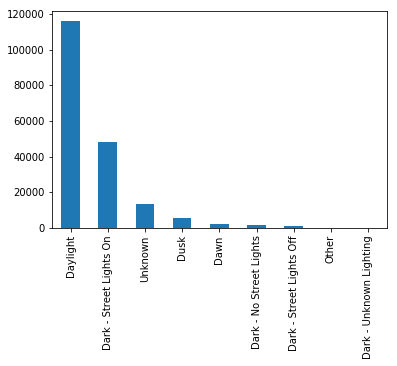

In [13]:
df_Conditions_balanced['LIGHTCOND'].value_counts().plot(kind = 'bar')

<p> Light conditions also have major impact on road accidents. Most accidents takes place in daylight as well as in night where lights are on. 
    

<p>Most crashes happened in clear, dry, and bright conditions. Most days are clear, dry, and bright, so it’s no surprise that most car crashes occur under these conditions. I also found out that crashes with a distracted driver or an impaired driver are statistically more likely to result in injury, which is also not a surprise. The results of the data indicate to city officials that they should ask drivers to be more alert in ideal conditions.